In [76]:
import numpy as np
import matplotlib

#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

np.random.seed(1)


def generate_data(sample_size):
    """Generate training data.

    Since
    f(x) = w^{T}x + b
    can be written as
    f(x) = (w^{T}, b)(x^{T}, 1)^{T},
    for the sake of simpler implementation of SVM,
    we return (x^{T}, 1)^{T} instead of x

    :param sample_size: number of data points in the sample
    :return: a tuple of data point and label
    """

    x = np.random.normal(size=(sample_size, 3))
    x[:, 2] = 1.
    x[:sample_size // 2, 0] -= 5.
    x[sample_size // 2:, 0] += 5.
    y = np.concatenate([np.ones(sample_size // 2, dtype=np.int64),
                        -np.ones(sample_size // 2, dtype=np.int64)])
    x[:3, 1] -= 5.
    y[:3] = -1
    x[-3:, 1] += 5.
    y[-3:] = 1
    return x, y


def grad(X, Y, w):
    n = X.shape[0]
    T = np.empty(X.shape, dtype=float)
    for i in range(n):
        x = X[i]
        y = Y[i]
        z = 1 - x.dot(w.T) * y
        if z > 0:
            T[i] = -1*y*x
        elif z == 0:
            for j in range(3):
                T[i, j] = np.random.rand()*(-1*y*x[j])
        else:
            T[i] = np.array([0., 0., 0.])
    return T

def svm(x, y, l, lr):
    """Linear SVM implementation using gradient descent algorithm.

    f_w(x) = w^{T} (x^{T}, 1)^{T}

    :param x: data points
    :param y: label
    :param l: regularization parameter
    :param lr: learning rate
    :return: three-dimensional vector w
    """

    w = np.random.rand(3)
    prev_w = w.copy()
    for _ in range(10 ** 4):
        # implement here
        w = prev_w - lr * ( np.sum(grad(x, y, w), axis=0) + l * prev_w)
        if np.linalg.norm(w - prev_w) < 1e-3:
            break
        prev_w = w.copy()

    return w


def visualize(x, y, w):
    plt.clf()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.scatter(x[y == 1, 0], x[y == 1, 1])
    plt.scatter(x[y == -1, 0], x[y == -1, 1])
    plt.plot([-10, 10], -(w[2] + np.array([-10, 10]) * w[0]) / w[1])
    #plt.savefig('lecture6-h2.png')

def accuracy(X, Y, w):
    correct = 0
    error = 0
    for i in range(X.shape[0]):
        if np.sum(X[i].dot(w.T))*Y[i] > 0:
            correct += 1
        else:
            error += 1
    return correct, error

In [63]:
x, y = generate_data(200)

correct = 198 wrong =  2


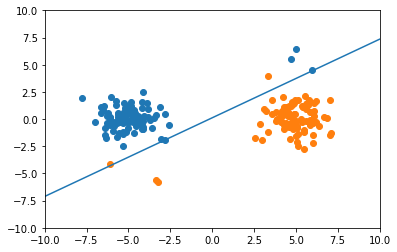

In [77]:
w = svm(x, y, l=0.1, lr=1.)
visualize(x, y, w)
c,e = accuracy(x, y, w)
print("correct =", c ,"wrong = ", e)

correct = 198 wrong =  2


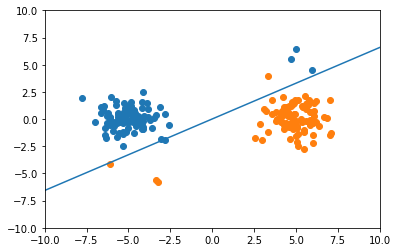

In [78]:
w = svm(x, y, l=0.1, lr=0.1)
visualize(x, y, w)
c,e = accuracy(x, y, w)
print("correct =", c ,"wrong = ", e)

correct = 198 wrong =  2


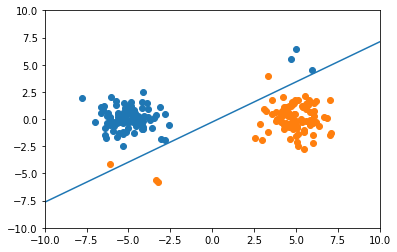

In [79]:
w = svm(x, y, l=0.1, lr=0.01)
visualize(x, y, w)
c,e = accuracy(x, y, w)
print("correct =", c ,"wrong = ", e)

correct = 197 wrong =  3


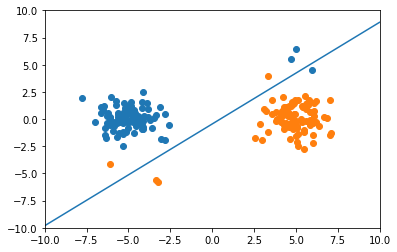

In [81]:
w = svm(x, y, l=0.1, lr=0.001)
visualize(x, y, w)
c,e = accuracy(x, y, w)
print("correct =", c ,"wrong = ", e)

correct = 197 wrong =  3


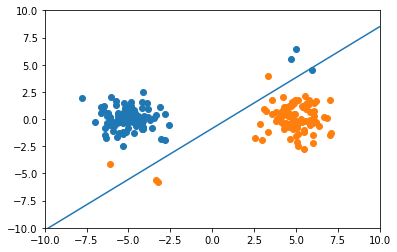

In [82]:
w = svm(x, y, l=0.1, lr=0.0001)
visualize(x, y, w)
c,e = accuracy(x, y, w)
print("correct =", c ,"wrong = ", e)

correct = 197 wrong =  3


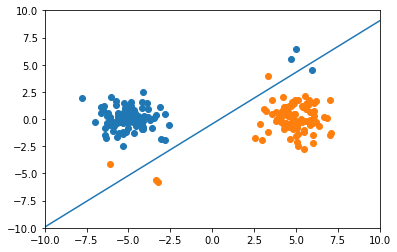

In [83]:
w = svm(x, y, l=0.01, lr=0.001)
visualize(x, y, w)
c,e = accuracy(x, y, w)
print("correct =", c ,"wrong = ", e)